#  Amazon Alexa Reviews Sentiment Analysis

##  Introduction
There are three goals for this project.
<ul>
    <li>Firstly, in the EDA & Visualizations, the overall analysis for rating, feedback, and each variation of the Alexa products is given. At the end of this part, A summary is given, which gives the information about which Alexa products are the most popular, which ones are needed to be improved, and what characters are for positive or negative review. 
    <li>Then the other goal is to use Machine Learning algorithms to build a model to predict if one given review is positive or negative. To achieve this goal, first the words are extracted from the reviews. Then in the Machine Learning part, the Logistic Regression is used to build the model. Some algorithms dealing with imbalanced data are applied to the data, and the performance of different algorthms are compared during building Logistic REgression model with some techniques. Additional, the RandomForest is also tried to build the model.
    <li> The last goal is Topic Modeling of the Consumer reviews. The further investigation about how to improve Alexa products is conducted based on Topic Modeling.
    <li>At last, the future work plan is given based on the existing work.


## EDA & Visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
df=pd.read_csv('E:/spingboard/project/amazon_alexa.tsv',sep='\t')

In [4]:
print('Shape of DataFrame is {}'.format(df.shape))

Shape of DataFrame is (3150, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [6]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### 1. Rating 

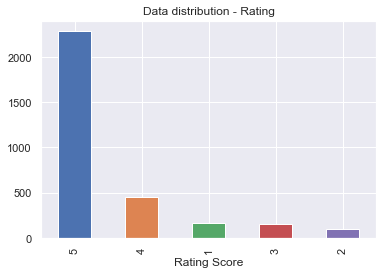

In [9]:
sns.set()
df['rating'].value_counts().plot(kind='bar')
plt.title('Data distribution - Rating')
plt.xlabel('Rating Score')
plt.show()

#### 2. Feedback 

1    2893
0     257
Name: feedback, dtype: int64


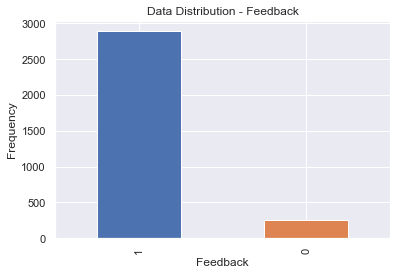

In [11]:
print(df['feedback'].value_counts())

df['feedback'].value_counts().plot(kind='bar')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.title('Data Distribution - Feedback')
plt.show()

<p><b>Analysis:</b> The result shows that most reviews are positive. So the dataset is very imbalanced.</p>

Text(0.5, 1.0, 'Relationship between Rating and Feedback')

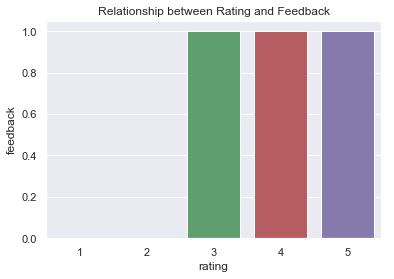

In [12]:
ax = sns.barplot(x="rating", y='feedback',data=df)
ax.set_title('Relationship between Rating and Feedback')


Text(0.5, 1.0, 'Relationship between Rating and Feedback')

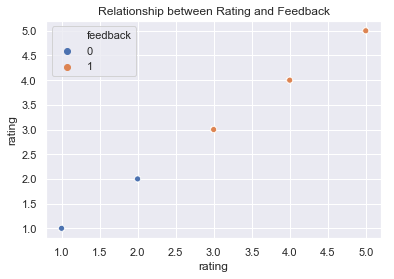

In [13]:
ax = sns.scatterplot(x='rating',y='rating',hue='feedback',data=df)
ax.set_title('Relationship between Rating and Feedback')

<b>Analysis:</b>The result shows that the reviews which have rating score under 3 are negtive review, and those have rating score greater or equal to 3 are positive. 

#### 3. variation 

In [14]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [15]:
df['variation'].value_counts(dropna=False)

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [18]:
def FN(x):
    AB=''
    L=x.split()    
    for c in L:        
        AB += c[0]
    return AB

In [19]:
df['Ab_variation']=[FN(x) for x in df['variation']]
print(df.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback Ab_variation  
0                                      Love my Echo!         1           CF  
1                                          Loved it!         1           CF  
2  Sometimes while playing a game, you can answer...         1           WF  
3  I have had a lot of fun with this thing. My 4 ...         1           CF  
4                                              Music         1           CF  


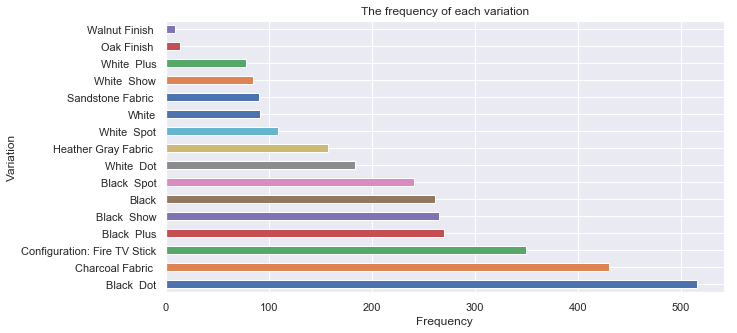

In [23]:
plt.figure(figsize=(10,5))
df['variation'].value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Variation')
plt.title('The frequency of each variation')
plt.show()

<b>Analysis:</b> The plot shows the requency distribution of each variation of Alexa, which gives a clue what variations sell well. it is found Black Dot could be the one has the higest sale, but weather both the rating and review for it are also good need to be investigated further. Will do it next.

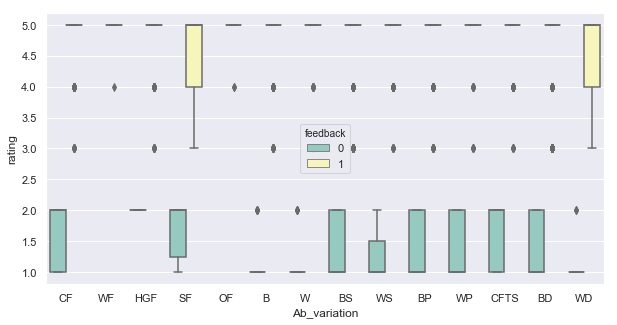

In [21]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Ab_variation", y="rating", hue="feedback",data=df, palette="Set3")

<b>Analysis:</b> Based on the plot, it is found that White Finish (WF), Ock Finish (OF) have no negative review and rating. Heather Gray Fabric (HGF) also has much less negative review. But as we known from the plot above, these three variations could have low sales, which could cause they have much less or no negative review. So this does not mean these three variations are more popular than the others. We need to see the sales of each variation to make conclusion.  

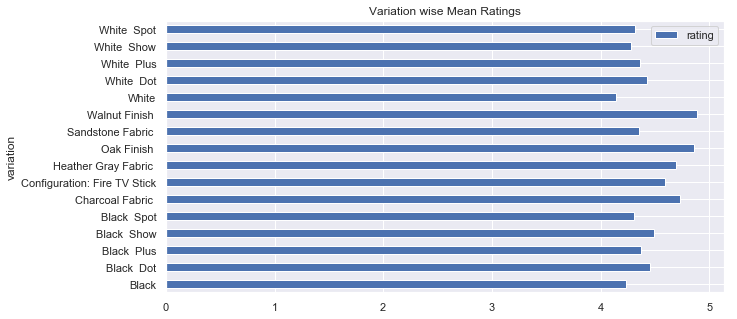

In [24]:
df.groupby('variation').mean()[['rating']].plot.barh(figsize=(10,5))
plt.title("Variation wise Mean Ratings");

<b>Analysis:</b> Based on the comprehensive analysis of the these plots above, it is found that White Dot,Black Dot, Walnut Finish, Oak Finish, Heather Gray Fabric higher rating score. But Walnut Finish, Oak Finish, Heather Gray Fabric have small sale quantity. White Dot has higher rating score than Black Dot, but has less sale quantity than Black Dot. So based on comprehensive analysis, White Dot and Black Dot are the most popular variations.

#### 4. verified_reviews 

In [26]:
df['verified_reviews'].str.strip()
print(df['verified_reviews'].head())

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object


In [27]:
df.loc[df['verified_reviews']==' ']

,rating,date,variation,verified_reviews,feedback,Ab_variation
85,5,30-Jul-18,Heather Gray Fabric,,1,HGF
183,3,29-Jul-18,Heather Gray Fabric,,1,HGF
219,5,29-Jul-18,Sandstone Fabric,,1,SF
374,1,26-Jul-18,Black,,0,B
406,1,16-Jul-18,White,,0,W
524,2,20-Jun-18,White,,0,W
654,5,26-May-18,Black,,1,B
780,5,30-Jul-18,Heather Gray Fabric,,1,HGF
878,3,29-Jul-18,Heather Gray Fabric,,1,HGF
914,5,29-Jul-18,Sandstone Fabric,,1,SF


<b>Analysis:</b> As we can see, the missing values in "verified_reviews" column are replaced with " ". This does make sense for sentiment analysis..

In [22]:
test.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Ab_variation        0
dtype: int64

In [28]:
df['review_length']=df['verified_reviews'].str.len()
print(df.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback Ab_variation  \
0                                      Love my Echo!         1           CF   
1                                          Loved it!         1           CF   
2  Sometimes while playing a game, you can answer...         1           WF   
3  I have had a lot of fun with this thing. My 4 ...         1           CF   
4                                              Music         1           CF   

   review_length  
0             13  
1              9  
2            195  
3            172  
4              5  


In [29]:
df['review_length'].describe()
pd.DataFrame(df.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.049524,182.099952,1.0,30.0,74.0,165.0,2851.0


In [26]:
test['verified_reviews'].describe()
pd.DataFrame(test.verified_reviews.describe()).T

,count,unique,top,freq
verified_reviews,3150,2301,NaN,79


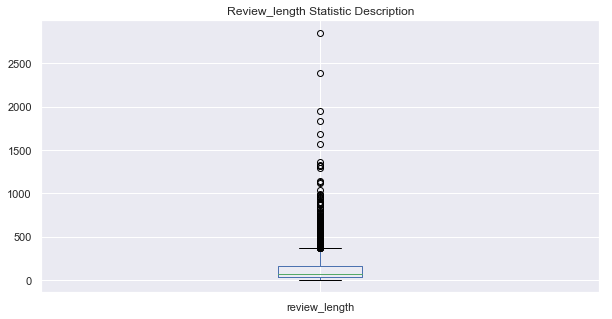

In [30]:
df.boxplot(column='review_length',figsize=(10,5))
plt.title('Review_length Statistic Description')
plt.show()

<b>Analysis:</b> Most reviews are no more than 500 words. 

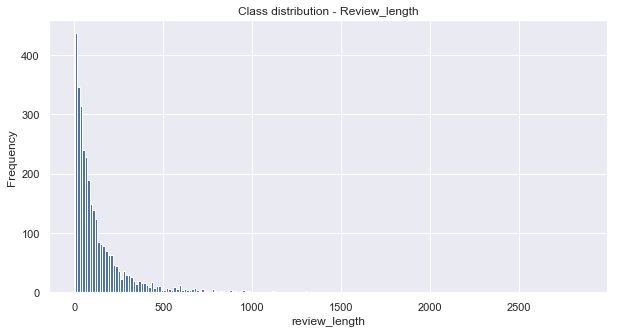

In [31]:
df['review_length'].plot(kind='hist',bins=200,figsize=(10,5))
plt.title('Class distribution - Review_length')
plt.xlabel('review_length')
plt.show()

<b>Analysis:</b>The plot shows most reviews are short.

Text(0, 0.5, 'Mean of review_length')

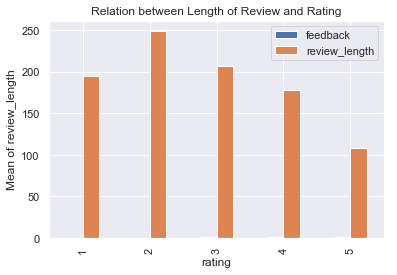

In [44]:
test2=df.groupby('rating').mean()
test2.head()
test2.plot(kind='bar',title='Relation between Length of Review and Rating')
plt.ylabel('Mean of review_length')

<b>Analysis:</b> The plot shows that reviews with 4 or 5 rating score have lower mean of length of review.  

Text(0, 0.5, 'Mean of review_length')

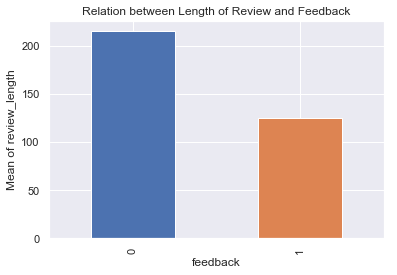

In [32]:
test3=df.groupby('feedback').mean()
test3['review_length'].plot(kind='bar',title='Relation between Length of Review and Feedback')
plt.ylabel('Mean of review_length')


<b>Analysis:</b> Negative reviews have higer average number of words for review.

Text(0.5, 1.0, 'Review Length per Feedback')

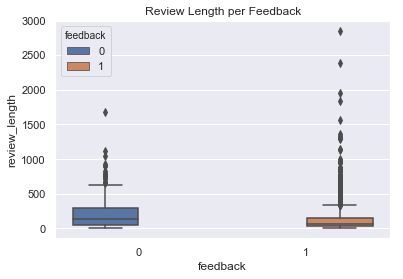

In [33]:
ax = sns.boxplot(x='feedback',y='review_length',hue='feedback',data=df)
ax.set_title('Review Length per Feedback')

<b>Analysis: </b>It seems the length of reviews is negativly related to feedback, which means there could be significant difference in the length between positive and negative reviews. I am going to use Hypothesis testing to discover insight into it. 
<br>
H0: review_length_negative - review_lengthe_positive = 0
<br>
H1: review_length_negative - review_lengthe_positive > 0

In [34]:
review_length_negative = df[df['feedback']==0]['review_length']
review_length_positive = df[df['feedback']==1]['review_length']

In [37]:
from scipy import stats
stats.ttest_ind(review_length_negative,review_length_positive)

Ttest_indResult(statistic=7.712835679990243, pvalue=1.6393106725879995e-14)

<b>Conclusion: </b>p-value < 0.01, so we can not accept the Null hypothesis. So there is significant difference in the length between positive and negative reviews.

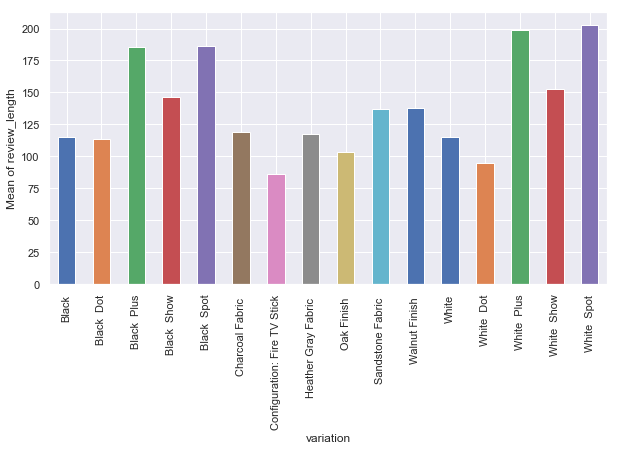

In [39]:
test4=df.groupby('variation').mean()
plt.figure(figsize=(10,5))
plt.ylabel('Mean of review_length')
test4['review_length'].plot(kind='bar')

<b>Analysis:</b> White Spot and Black Spot, White Plus and Black Plus have longer review, which could mean much there could many consumers not satisfied with them.

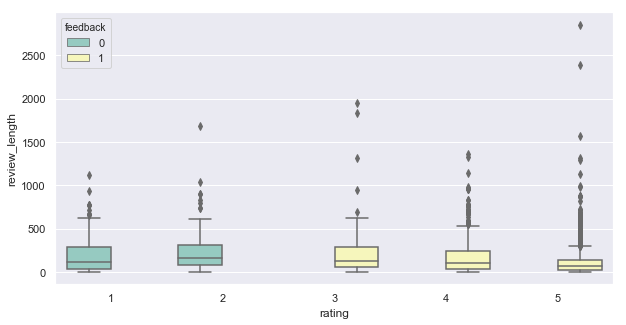

In [41]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="rating", y="review_length", hue="feedback",data=df, palette="Set3")

<b>Analysis:</b> It is found that the reviews with higher rating score have less review words, and vice verse.

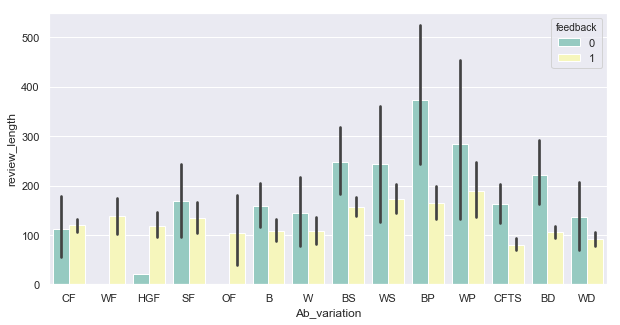

In [43]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Ab_variation", y="review_length", hue="feedback",data=df, palette="Set3")

<b>Analysis:</b> The plot shows negative reviews have more review words.

#### Summary
1. Basicly consumers like Alexa.
2. Low level of rating tends to have long reviews. 
3. Negative feedback tends to have long reviews.
4. White Dot and Black Dot are the most popular products.
5. White Spot and Black Spot, White Plus and Black Plus might be the variations that need to be improved.

## Feature Engineering

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from string import punctuation

import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
# Data Preprocessing, based on https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24?gi=64eab4e0dd2f
# Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
# Words that have fewer than 3 characters are removed.
# All stopwords are removed.
# Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
# Words are stemmed — words are reduced to their root form.

stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [54]:
review_text = df.loc[:,['verified_reviews']]
review_text['index'] = review_text.index
documents = review_text
processed_docs = documents['verified_reviews'].map(preprocess)
processed_docs[:10]

0                                         [love, echo]
1                                               [love]
2    [play, game, answer, question, correct, alexa,...
3    [thing, learn, dinosaur, control, light, play,...
4                                              [music]
5    [receiv, echo, gift, need, bluetooth, play, mu...
6    [have, cellphon, featur, ipad, great, alarm, d...
7    [think, purchas, work, get, room, hous, like, ...
8                                        [look, great]
9    [love, listen, song, haven, hear, childhood, n...
Name: verified_reviews, dtype: object

Dictionary(2360 unique tokens: ['echo', 'love', 'abl', 'alexa', 'answer']...)


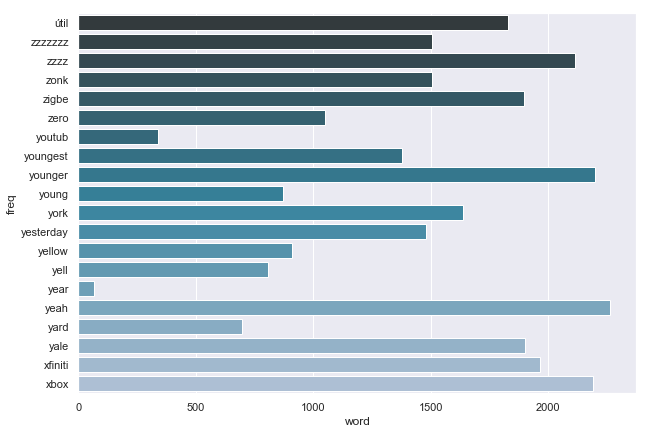

In [64]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(dictionary)
word_counter = collections.Counter(dictionary) 
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(10, 7))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [82]:
# Data preprocessing for "verified_reviews", based on https://github.com/bertcarremans/TwitterUSAirlineSentiment/blob/master/source/Predicting%20sentiment%20with%20text%20features.ipynb
# remove all punctuations, including the question and exclamation marks
# remove the urls as they do not contain useful information and we did not notice a distinction in the number of urls used between the sentiment classes
# make sure the converted emojis are kept as one word.
# remove digits
# remove stopwords
# apply the PorterStemmer to keep the stem of the words
import string
class CleanText():
    def remove_punctuation(self,input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self,input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self,input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self,input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
   
    def transform(self,X, **transform_params):
        clean_X = X.apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X


In [86]:
ct = CleanText()
cleaned_reviews = ct.transform(df.verified_reviews)
cleaned_reviews.sample(5)

2822              complet love absolut everyth amaz great
2210                                             eas usag
3010    sound terribl cannot pair echo play simultan m...
998                                love hard time set app
2026                               love light bulb featur
Name: verified_reviews, dtype: object

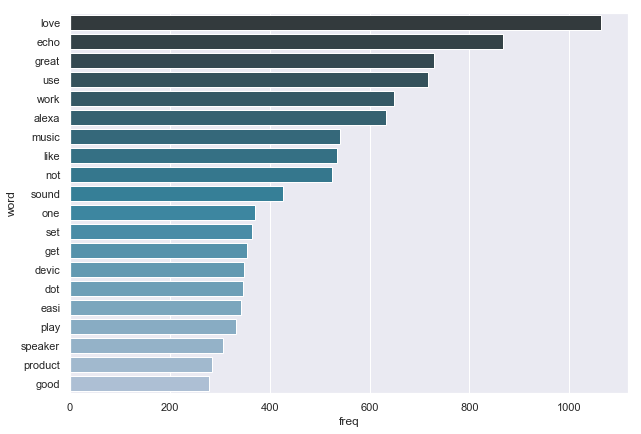

In [144]:
review_vec = CountVectorizer()
review_X = review_vec.fit_transform(cleaned_reviews)
word_freq = dict(zip(review_vec.get_feature_names(), np.asarray(review_X.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(10, 7))
bar_freq_word = sns.barplot(x="freq", y="word", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

<b>Analysis:</b> We can see what are the 20 most frequently occurred words from consumer reviews.  

## Machine Learning Model

#### 1. LogisticRegression

In [108]:
features = pd.DataFrame(review_X.toarray(), columns=review_vec.vocabulary_)
features = pd.get_dummies(features)
target = df[['feedback']].astype(int)

In [153]:
features.head()

,love,my,echo,loved,it,sometimes,while,playing,game,you,...,solo,alcohol,barry,ages,adults,locations,dead,stat,bothered,spaces
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [130]:
#warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9680729760547321
[[ 40  48]
 [  8 849]]
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        88
           1       0.95      0.99      0.97       857

   micro avg       0.94      0.94      0.94       945
   macro avg       0.89      0.72      0.78       945
weighted avg       0.94      0.94      0.93       945



In [135]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid_inst = {'C': c_space}
logreg_cv = GridSearchCV(logreg, param_grid_inst, cv=5)
logreg_cv.fit(X_train, y_train.values.ravel())
y_pred = logreg_cv.predict(X_test)
print(f1_score(y_test.values.ravel(),y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9632560768795929
[[ 28  60]
 [  5 852]]
              precision    recall  f1-score   support

           0       0.85      0.32      0.46        88
           1       0.93      0.99      0.96       857

   micro avg       0.93      0.93      0.93       945
   macro avg       0.89      0.66      0.71       945
weighted avg       0.93      0.93      0.92       945



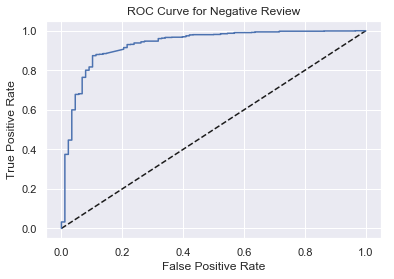

In [114]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
fpr, tpr, threshods = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Negative Review')
plt.show()

#### Analysis:
<ul><li> According to the classfication_report, imbalance of dataset could have a negative impact on the model training. So need to try approaches to deal with imbalance data to see if can get better model. </li>

</ul>
I am going to try RandonForestClassifier to see if I can get better result from it.

#### 2. RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [132]:
model = RandomForestClassifier()

In [133]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv_object = StratifiedKFold(n_splits=5)

forest_gridCV = GridSearchCV(estimator=model, param_grid=params, cv=cv_object, verbose=0, return_train_score=True)
forest_gridCV.fit(X_train, y_train.values.ravel())
y_pred_forest = forest_gridCV.predict(X_test)
print(f1_score(y_test.values.ravel(),y_pred))
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

0.9632560768795929
[[  9  79]
 [  0 857]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.19        88
           1       0.92      1.00      0.96       857

   micro avg       0.92      0.92      0.92       945
   macro avg       0.96      0.55      0.57       945
weighted avg       0.92      0.92      0.88       945



In [141]:
feature_imp_df = pd.DataFrame([forest_gridCV.best_estimator_.feature_importances_], columns=list(X_train.columns)).T
feature_imp_df.columns = ['imp']
feature_imp_df.sort_values('imp', ascending=False, inplace=True)

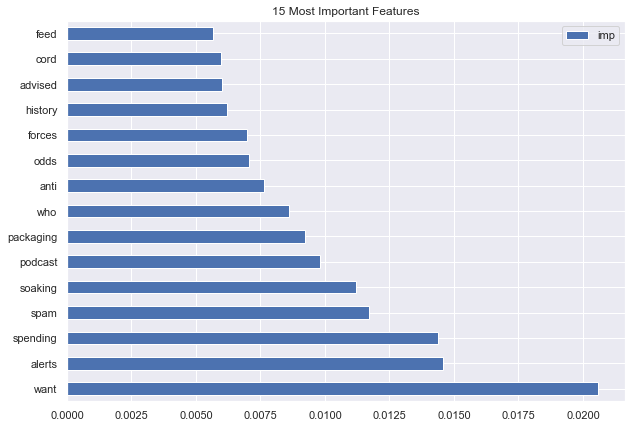

In [143]:
feature_imp_df.head(15).plot.barh(figsize=(10, 7))
plt.title("15 Most Important Features");

#### 3. Comparision of LogisticRegerssion and RadomForestClassifier

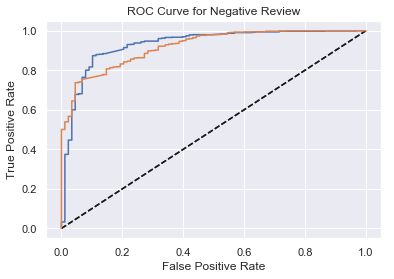

In [147]:
from sklearn.metrics import roc_curve

y_pred_prob_lr = logreg_cv.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, threshods_lr = roc_curve(y_test, y_pred_prob_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr)

y_pred_prob_fst = forest_gridCV.predict_proba(X_test)[:,1]
fpr_fst, tpr_fst, threshods_fst = roc_curve(y_test, y_pred_prob_fst)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_fst, tpr_fst)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Negative Review')
plt.show()

<b>Conclusion:</b> Basicly, LogisticRegression is better than RandomForestClassifier. Next, I am going to apply imbalanced data processing algorithms on the LogisticRegression model to see if can improve the model.

## Dealing with Imbalanced Data based on LogisticRegression

In [115]:
# The code in this cell refers to https://www.kaggle.com/npramod/techniques-to-deal-with-imbalanced-data
# Using Techniques to deal with imbalanced data

from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN,SMOTETomek
import collections

def benchmark(sampling_type,X_train,y_train,X_test,y_test):
    lr = LogisticRegression(penalty = 'l1')
    # param_grid = {'C':[0.01,0.1,1,10]}
    param_grid = {'C':np.logspace(-5, 8, 15)}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
    gs = gs.fit(X.values,y.values.ravel())
    y_pred = gs.predict(X_test)
    print(classification_report(y_test, y_pred))
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled = transformer.fit_sample(X.values,y.values.ravel())
    print('data distribution:{}'.format(collections.Counter(y_resampled)))
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

datasets=[]
datasets.append(("base",X_train,y_train))
datasets.append(transform(RandomUnderSampler(),X_train,y_train))
datasets.append(transform(SMOTE(n_jobs=-1),X_train,y_train))
datasets.append(transform(ClusterCentroids(n_jobs=-1),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train,y_train))
datasets.append(transform(SMOTEENN(),X_train,y_train))
datasets.append(transform(SMOTETomek(),X_train,y_train))

benchmark_scores = []
for sample_type,X,y in datasets:
    benchmark_scores.append(benchmark(sample_type,X,y,X_test,y_test))
print(benchmark_scores)

Transforming RandomUnderSampler
data distribution:Counter({0: 169, 1: 169})
Transforming SMOTE
data distribution:Counter({1: 2036, 0: 2036})
Transforming ClusterCentroids
data distribution:Counter({0: 169, 1: 169})
Transforming NearMiss
data distribution:Counter({0: 169, 1: 169})
Transforming SMOTEENN
data distribution:Counter({0: 1311, 1: 744})
Transforming SMOTETomek
data distribution:Counter({1: 2036, 0: 2036})
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=1e-05 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=1e-05 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.3s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.3s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.3s
[CV] C=8.483428982440725e-05 .........................................
[CV] .

[CV] .............................. C=163789.3706954068, total=   0.3s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.3s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.3s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.3s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.3s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.3s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.3s
[CV] C=11787686.347935867 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   34.5s finished


              precision    recall  f1-score   support

           0       0.72      0.59      0.65        88
           1       0.96      0.98      0.97       857

   micro avg       0.94      0.94      0.94       945
   macro avg       0.84      0.78      0.81       945
weighted avg       0.94      0.94      0.94       945

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 ...............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.0007196856730011522 .........................................
[CV] .......................... C=0.0007196856730011522, total=   0.0s
[CV] C=0.0007196856730011522 .........................................
[CV] .......................... C=0.0007196856730011522, total=   0.0s
[CV] C=0.0007196856730011522 .........................................
[CV] .......................... C=0.0007196856730011522, total=   0.0s
[CV] C=0.0007196856730011522 .........................................
[CV] .......................... C=0.0007196856730011522, total=   0.0s
[CV] C=0.0007196856730011522 .........................................
[CV] .......................... C=0.0007196856730011522, total=   0.0s
[CV] C=0.006105402296585327 ..........................................
[CV] ........................... C=0.006105402296585327, total=   0.0s
[CV] C=0.006105402296585327 ..........................................
[CV] ........................... C=0.006105402296585327, total=   0.0s
[CV] 

[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=100000000.0 ...................................................
[CV] .................................... C=100000000.0, total=   0.0s
[CV] C=100000000.0 ...................................................
[CV] .................................... C=100000000.0, total=   0.0s
[CV] C=100000000.0 ...................................................
[CV] .................................... C=100000000.0, total=   0.0s
[CV] C=100000000.0 ...................................................
[CV] .................................... C=100000000.0, total=   0.0s
[CV] C=100000000.0 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] 

[CV] .............................. C=163789.3706954068, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.1s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C

[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] 

[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .

[CV] C=163789.3706954068 .............................................
[CV] .............................. C=163789.3706954068, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .......................... C=8.483428982440725e-05, total=   0.0s
[CV] C=8.483428982440725e-05 .........................................
[CV] .

[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=1389495.494373136 .............................................
[CV] .............................. C=1389495.494373136, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] ............................. C=11787686.347935867, total=   0.0s
[CV] C=11787686.347935867 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   14.5s finished


In [150]:
# The code in this cell refers to https://www.kaggle.com/npramod/techniques-to-deal-with-imbalanced-data
scores = []
# train models based on benchmark params
for sampling_type,score,param in benchmark_scores:
    print("Training on {}".format(sampling_type))
    lr = LogisticRegression(penalty = 'l1',C=param)
    for s_type,X,y in datasets:
        if s_type == sampling_type:
            lr.fit(X.values,y.values.ravel())
            pred_test = lr.predict(X_test.values)
            pred_test_probs = lr.predict_proba(X_test.values)
            probs = lr.decision_function(X_test.values)
            fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),pred_test)
            p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
            scores.append((sampling_type,
                           f1_score(y_test.values.ravel(),pred_test),
                           precision_score(y_test.values.ravel(),pred_test),
                           recall_score(y_test.values.ravel(),pred_test),
                           accuracy_score(y_test.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_test.values.ravel(),pred_test)))

Training on base
Training on RandomUnderSampler
Training on SMOTE
Training on ClusterCentroids
Training on NearMiss
Training on SMOTEENN
Training on SMOTETomek


In [151]:
sampling_results = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','auc_pr','confusion_matrix'])
sampling_results

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.967630,0.958763,0.976663,0.940741,0.783786,0.058028,"[[52, 36], [20, 837]]"
1,RandomUnderSampler,0.891152,0.980392,0.816803,0.819048,0.828856,0.074273,"[[74, 14], [157, 700]]"
2,SMOTE,0.951814,0.970874,0.933489,0.914286,0.830381,0.067726,"[[64, 24], [57, 800]]"
3,ClusterCentroids,0.737609,0.982524,0.590432,0.619048,0.744080,0.050759,"[[79, 9], [351, 506]]"
4,NearMiss,0.733529,0.984283,0.584597,0.614815,0.746844,0.071898,"[[80, 8], [356, 501]]"
5,SMOTEENN,0.841259,0.987421,0.732789,0.749206,0.820940,0.074043,"[[80, 8], [229, 628]]"
6,SMOTETomek,0.953571,0.973269,0.934656,0.917460,0.842328,0.073314,"[[66, 22], [56, 801]]"


#### Analysis:
<ul>
<li>All Undersampling algorithms can improve recall score of Negative Reviews, but comes at the cost of precision. It is because  </li>
<li>All Oversampling algorithms can improve recall score of Negative Reviews. Even though they got lower precision score than base model, higher precision score of base model might be resulted from overfit model since the data is very imbalanced. So Undersampling algorithms is better for this imbalanced data.
    
<li>Overall the SMOTETomek is the best choice for this case based on the data analysis result above.</li>


## Topic Modelling

#### 1. Bag of Words on the Data set

In [154]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result

In [166]:
cleaned_reviews_df = pd.DataFrame(cleaned_reviews)
cleaned_reviews_df['index']=cleaned_reviews.index
documents = cleaned_reviews_df
documents[:5]


,verified_reviews,index
0,love echo,0
1,love,1
2,sometim play game answer question correctli al...,2
3,lot fun thing yr old learn dinosaur control li...,3
4,music,4


In [167]:
processed_docs = documents['verified_reviews'].astype(str).map(preprocess)
processed_docs[:10]

0                                         [love, echo]
1                                               [love]
2    [sometim, play, game, answer, question, correc...
3    [thing, learn, dinosaur, control, light, play,...
4                                              [music]
5    [receiv, echo, gift, need, anoth, bluetooth, s...
6    [without, cellphon, cannot, mani, featur, ipad...
7    [think, purchas, work, everi, room, hous, real...
8                                        [look, great]
9    [love, listen, song, haven, heard, sinc, child...
Name: verified_reviews, dtype: object

In [168]:
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1), (1, 1)]

#### 2.TF-IDF

In [170]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#### 3. Running LDA using Bag of Words

In [171]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [172]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.176*"love" + 0.041*"echo" + 0.025*"thing" + 0.019*"learn" + 0.018*"everyth" + 0.017*"great" + 0.017*"alexa" + 0.015*"easi" + 0.015*"product" + 0.014*"like"
Topic: 1 
Words: 0.059*"love" + 0.040*"echo" + 0.023*"easi" + 0.021*"music" + 0.018*"good" + 0.017*"great" + 0.017*"sound" + 0.016*"play" + 0.015*"clock" + 0.014*"devic"
Topic: 2 
Words: 0.042*"love" + 0.039*"echo" + 0.025*"home" + 0.023*"music" + 0.021*"connect" + 0.020*"great" + 0.020*"work" + 0.019*"devic" + 0.015*"sound" + 0.013*"alexa"
Topic: 3 
Words: 0.055*"work" + 0.051*"like" + 0.031*"echo" + 0.021*"product" + 0.020*"bought" + 0.019*"refurbish" + 0.017*"alexa" + 0.016*"speaker" + 0.015*"thing" + 0.014*"would"
Topic: 4 
Words: 0.070*"great" + 0.049*"work" + 0.040*"music" + 0.029*"sound" + 0.024*"easi" + 0.024*"good" + 0.024*"love" + 0.017*"echo" + 0.017*"speaker" + 0.016*"well"
Topic: 5 
Words: 0.092*"great" + 0.046*"product" + 0.043*"sound" + 0.035*"echo" + 0.032*"easi" + 0.029*"work" + 0.026*"qualiti" + 

#### Analysis:
<ul><li> Based on the results of Topics model, Easy to Use, Sound, Speaker of Device, Musics are the topics consumers are interested in very much. So these insights do give the Amazon further information about how to improve their products.

#### Future work
Overall, the models are good, but needs to be improved for prediction negative reviews. Some future works are planned as follows: 
<ul>
    <li> Implement the imbalance techniques on the other approaches to convert words to number, like TF-IDF, and Word2Vec to see if can get better model than LogisticRegression.
    <li> Implement the imbalance techniques on the the other Classifier, like Naive Bayes model above to see if can get better result than LogisticRegression
    <li> Build a Naive Bayes model where the features are n-grams instead of words, so as to improve Topics Modeling.
        